<a href="https://colab.research.google.com/github/Gabs-Dimitri/SVM-Tree/blob/main/SVM_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

## Abrindo o conjunto de dados

In [2]:
dataset = pd.read_csv('IRIS.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Dividindo o conjunto de dados em treinamento e teste

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Escala dos atributos

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Treinando o modelo SVM com o conjunto de treinamento

In [5]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Prevendo os resultados do conjunto todo

In [6]:
y_pred_todo = classifier.predict(sc.transform(X))

## Criando a matriz de confusão

In [7]:
cm = confusion_matrix(y, y_pred_todo)
print(cm)
accuracy_score(y, y_pred_todo)

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


0.9733333333333334

## Criando visualização apenas com as pétalas

In [8]:
petalSVM = dataset.iloc[:, 2:5]

In [9]:
X_petal = petalSVM.iloc[:, :-1].values
y_petal = petalSVM.iloc[:, -1].values

In [10]:
X_petal_train, X_petal_test, y_petal_train, y_petal_test = train_test_split(X_petal, y_petal, test_size = 0.25, random_state = 0)

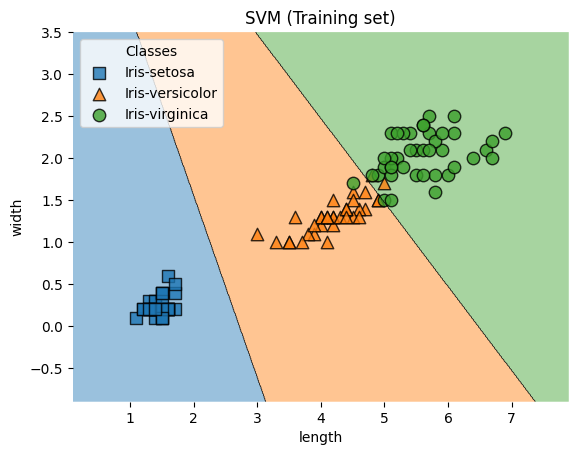

In [11]:
# Atribuindo o X_set e y_set
X_set, y_set = X_petal_train, y_petal_train

# Mapeando a classe para inteiro e convertendo a classe
class_mapping = {class_label: idx for idx, class_label in enumerate(np.unique(y_set))}    # sem esse mapeamento, estava dando erro no y_set, por isso foi necessário
y_set_int = np.array([class_mapping[class_label] for class_label in y_set])

# Criar e treinar o classificador SVM
classifier.fit(X_petal_train, y_set_int)  # y_set_int é utilizado para representar as classes como inteiros

# Plotar as regiões de decisão
plot_decision_regions(X_set, y_set_int, clf=classifier, legend=0, scatter_kwargs={'s': 80})

# Adicionar rótulos e título aos eixos
plt.title('SVM (Training set)')
plt.xlabel('length')
plt.ylabel('width')

# Adicionar legenda manualmente
handles, labels = plt.gca().get_legend_handles_labels()
class_names = [class_label for class_label in class_mapping]
plt.legend(handles, class_names, title='Classes')

# Mostrar o gráfico
plt.show()


# Decision Tree Classifier

## Trocando a classe pelo y previsto

In [12]:
dataset.drop(columns=['species'], inplace=True)

In [13]:
dataset['species'] = y_pred_todo

## Reabrindo para aplicar árvore

In [14]:
X_tree = dataset.iloc[:, :-1].values
y_tree = dataset.iloc[:, -1].values

## Dividindo em treino e teste

In [15]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, test_size = 0.25, random_state = 0)

## Escalonando

In [16]:
sc = StandardScaler()
X_tree_train = sc.fit_transform(X_tree_train)
X_tree_test = sc.transform(X_tree_test)

## Treinando a árvore

In [17]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_tree_train, y_tree_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Prevendo os resultados no conjunto todo

In [18]:
y_tree_pred_todo = classifier.predict(sc.transform(X_tree))

## Matriz de confusão

In [19]:
cm_1 = confusion_matrix(y_tree, y_tree_pred_todo)
print(cm_1)
accuracy_score(y_tree, y_tree_pred_todo)

[[50  0  0]
 [ 0 48  0]
 [ 0  2 50]]


0.9866666666666667

## Criando visualização para árvore com as pétalas

In [20]:
# Dataset com as pétalas
petalTree = dataset.iloc[:, 2:5]

In [21]:
# Atributos e classe
X_petal_tree = petalTree.iloc[:, :-1].values
y_petal_tree = petalTree.iloc[:, -1].values

In [22]:
# Split treino e teste
X_petal_tree_train, X_petal_tree_test, y_petal_tree_train, y_petal_tree_test = train_test_split(X_petal_tree, y_petal_tree, test_size = 0.25, random_state = 0)

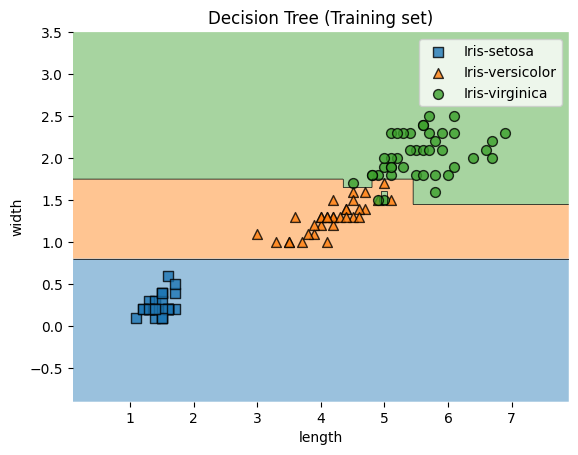

In [23]:
# Atribuindo o X_set e y_set
X_set, y_set = X_petal_tree_train, y_petal_tree_train

# Mapeando a classe para inteiro e convertendo a classe
class_mapping = {class_label: idx for idx, class_label in enumerate(np.unique(y_set))}    # sem esse mapeamento, estava dando erro no y_set, por isso foi necessário
y_set_int = np.array([class_mapping[class_label] for class_label in y_set])

# Classificador
classifier.fit(X_petal_tree_train, y_set_int)

# Plot das regiões de decisão
# clf: classificador, legend: legenda (0 desativa a legenda), scatter_kwargs: tamanho dos pontos
plot_decision_regions(X_set, y_set_int, clf=classifier, legend=0, scatter_kwargs={'s': 50})

# Rótulos e título
plt.title('Decision Tree (Training set)')
plt.xlabel('length')
plt.ylabel('width')

# Criação da legenda manualmente
handles, labels = plt.gca().get_legend_handles_labels()
class_names = [class_label for class_label in class_mapping]
plt.legend(handles, class_names)

# Mostrar o gráfico
plt.show()

# Dataset fictício

## Reabrindo conjunto de dados

In [24]:
dataset = pd.read_csv('IRIS.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Excluindo a classe

Isso ajuda no manuseio para o novo dataset

In [25]:
dataset.drop(columns=['species'], inplace=True)

## Criando um dataset fictício

In [26]:
dataset_ficticio = pd.DataFrame()

## Sorteando valores do dataset original e adicionando no fictício

In [27]:
for _ in range(10):
  novas_linhas = dataset.sample(n=150, axis=None)
  dataset_ficticio = pd.concat([dataset_ficticio, novas_linhas], ignore_index=True)

## Adicionando a classe de volta ao dataset original

In [29]:
dataset['species'] = y

## Criando a variável X no dataset fictício

In [30]:
X_ficticio = dataset_ficticio.iloc[:, :].values

## Treinando o modelo

In [31]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Prevendo a classe

In [32]:
y_ficticio = classifier.predict(sc.transform(X_ficticio))

## Adicionando ao dataset fictício

In [33]:
dataset_ficticio['species'] = y_ficticio

## Concatenando os dois datasets

In [34]:
dataset = pd.concat([dataset, dataset_ficticio], ignore_index=True)

# Decision Tree Classifier (fictício)

## Refazendo as variáveis

In [35]:
novo_X = dataset.iloc[:, :-1].values
novo_y = dataset.iloc[:, -1].values

## Dividindo em treino e teste

In [36]:
novo_X_train, novo_X_test, novo_y_train, novo_y_test = train_test_split(novo_X, novo_y, test_size = 0.25, random_state = 0)

## Treinando

In [37]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(novo_X_train, novo_y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Prevendo resultados

In [38]:
novo_y_pred = classifier.predict(novo_X)

## Matriz de confusão e acurácia

In [39]:
nova_cm = confusion_matrix(novo_y, novo_y_pred)
print(nova_cm)
accuracy_score(novo_y, novo_y_pred)

[[7550    0    0]
 [   0 7247    3]
 [   0    1 7849]]


0.9998233995584989

## Criando visualização

In [40]:
petalTreeF = dataset.iloc[:, 2:5]

In [41]:
X_petal_treeF = petalTreeF.iloc[:, :-1].values
y_petal_treeF = petalTreeF.iloc[:, -1].values

In [42]:
X_petal_treeF_train, X_petal_treeF_test, y_petal_treeF_train, y_petal_treeF_test = train_test_split(X_petal_treeF, y_petal_treeF, test_size = 0.25, random_state = 0)

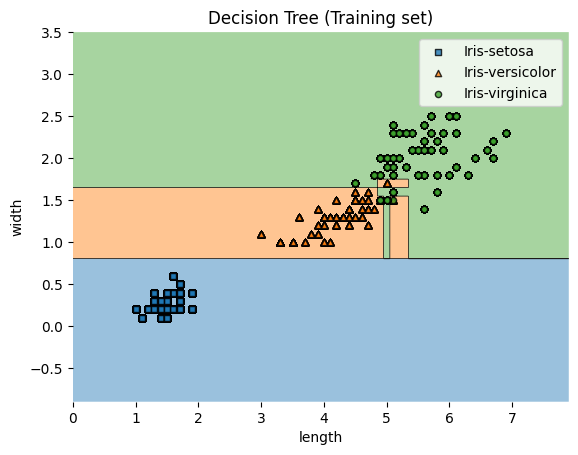

In [45]:
# Atribuindo o X_set e y_set
X_set, y_set = X_petal_treeF_train, y_petal_treeF_train

# Mapeando a classe para inteiro e convertendo a classe
class_mapping = {class_label: idx for idx, class_label in enumerate(np.unique(y_set))}    # sem esse mapeamento, estava dando erro no y_set, por isso foi necessário
y_set_int = np.array([class_mapping[class_label] for class_label in y_set])

# Classificador
classifier.fit(X_petal_treeF_train, y_set_int)

# Plot das regiões de decisão
# clf: classificador, legend: legenda (0 desativa a legenda), scatter_kwargs: tamanho dos pontos
plot_decision_regions(X_set, y_set_int, clf=classifier, legend=0, scatter_kwargs={'s': 20})

# Rótulos e título
plt.title('Decision Tree (Training set)')
plt.xlabel('length')
plt.ylabel('width')

# Criação da legenda manualmente
handles, labels = plt.gca().get_legend_handles_labels()
class_names = [class_label for class_label in class_mapping]
plt.legend(handles, class_names)

# Mostrar o gráfico
plt.show()